# import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the datasets

In [8]:
df=pd.read_excel('Final_Train.xlsx')
df.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [9]:
#loading the test dataset
dft=pd.read_excel('Final_Test.xlsx')
dft.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# features of the data

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

# preprocessing

In [10]:
#checking the shape of train and test data

print('df:',df.shape)
print('\n')
print('dft:',dft.shape)

df: (5961, 7)


dft: (1987, 6)


# train data

In [11]:
#checking the types of data
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [12]:
#cheking the columns about the data
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [13]:
#checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [14]:
#checking the null values in the data
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

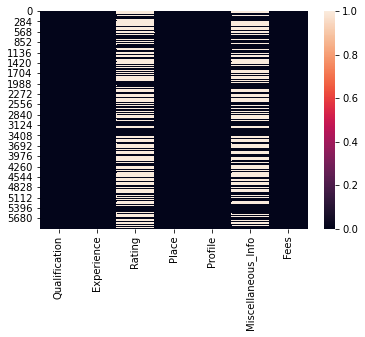

In [15]:
#using heatmap for better representation of the null values
sns.heatmap(df.isnull())

In [16]:
#filling the null values 
df.fillna(method='ffill', inplace=True)

In [17]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

# Summary statistics

In [19]:
#describing the dataset
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


observation:
    the min fee of doctor consultation is 50
    max fee of doctor consoltation is 950

# Visualizations

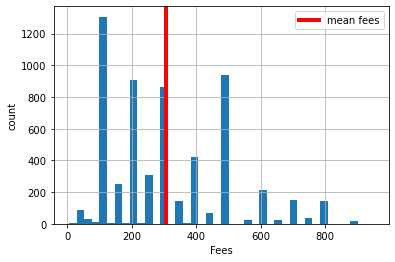

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [21]:
#checking the mean fee

fee=df['Fees'].hist(bins=40)
mean_val =np.mean(df['Fees'])
plt.axvline(mean_val, linewidth=4,color='red', label='mean fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

print(df['Fees'].value_counts())

# Experience vs fees

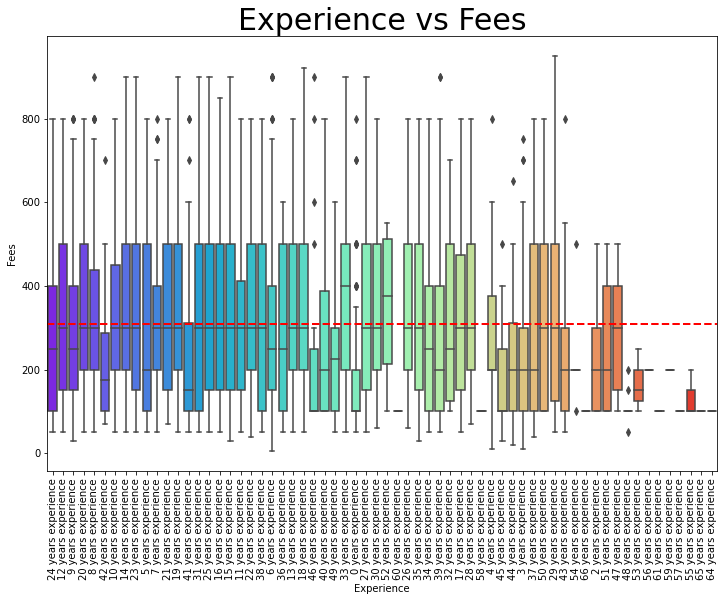

In [22]:
plt.figure(figsize=(12,8))
mean_fee=np.mean(df['Fees'])
sns.boxplot(y='Fees',x='Experience',data=df,palette='rainbow')
plt.axhline(mean_fee,color='r',linestyle='dashed',linewidth=2)
plt.title('Experience vs Fees', fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

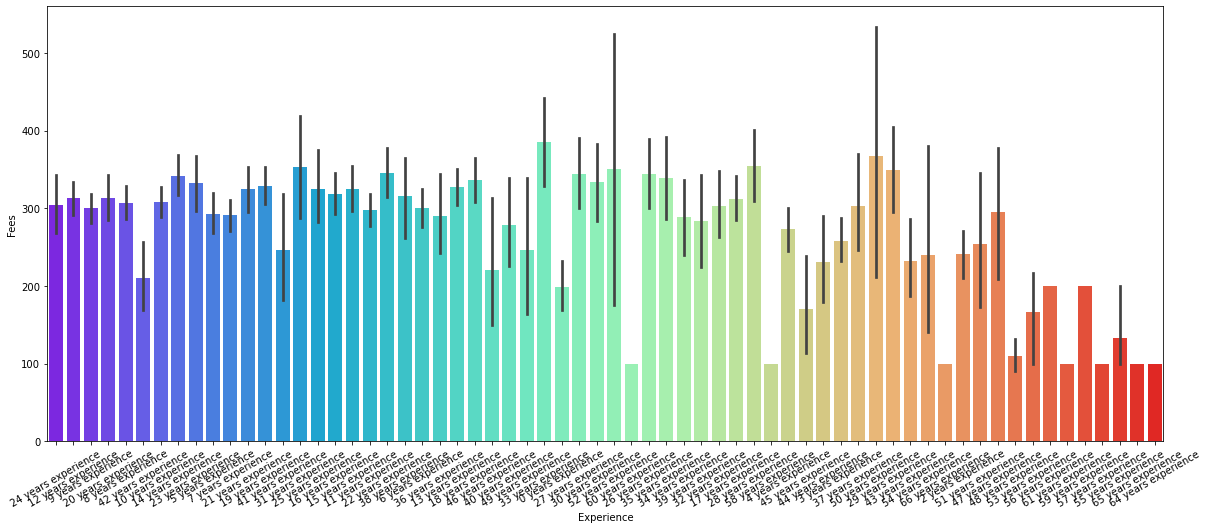

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x='Experience',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

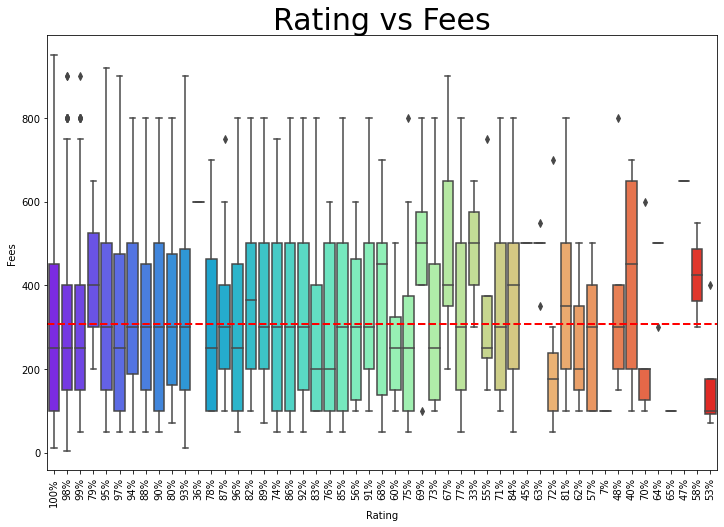

In [25]:
plt.figure(figsize=(12,8))
mean_fee=np.mean(df['Fees'])
sns.boxplot(y='Fees',x='Rating',data=df,palette='rainbow')
plt.axhline(mean_fee,color='r',linestyle='dashed',linewidth=2)
plt.title('Rating vs Fees', fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

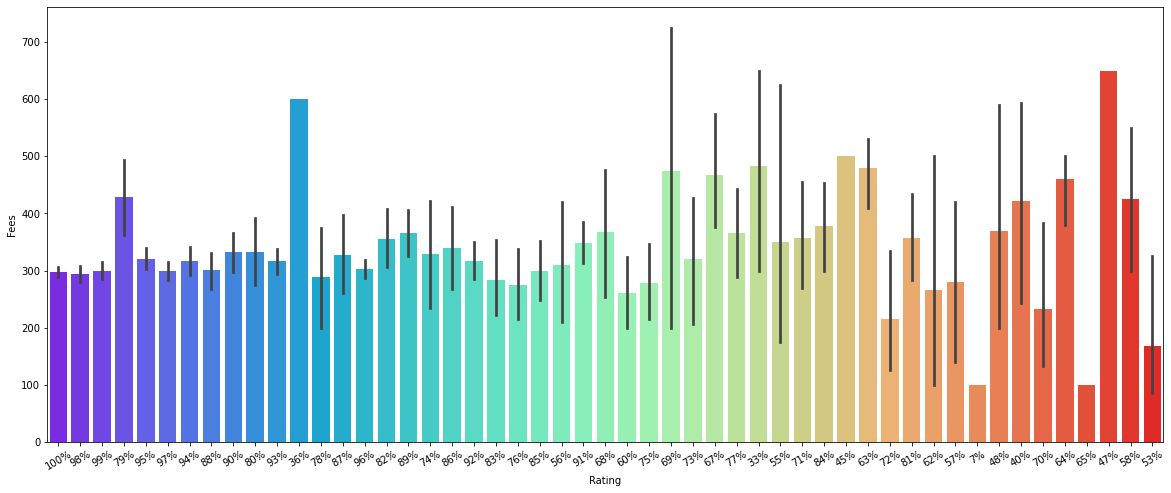

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='Rating',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

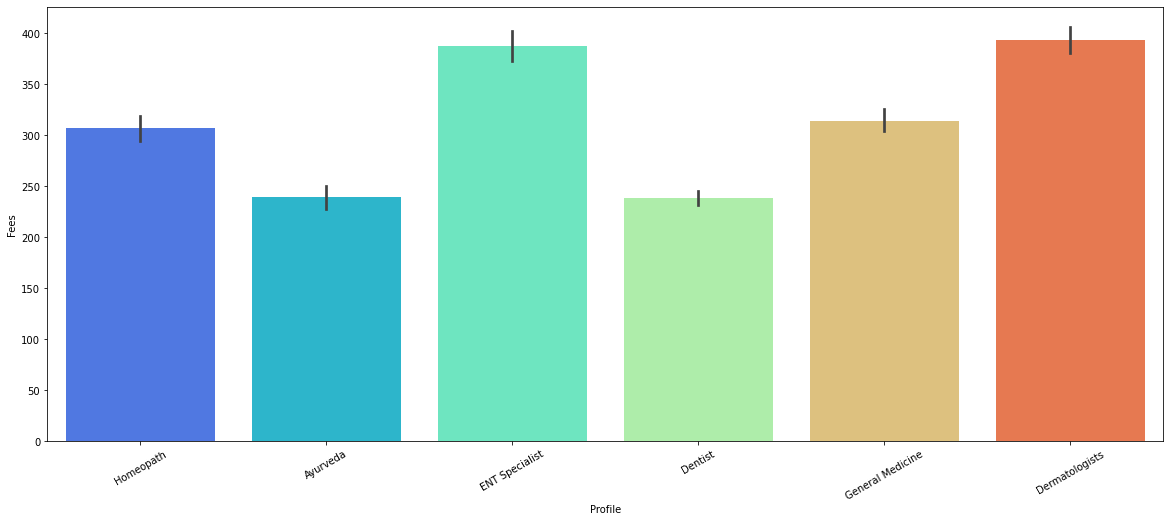

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x='Profile',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# handling categorical values

In [28]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [29]:
#trasnforming the non numerical data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Qualification','Experience','Rating','Place','Profile','Miscellaneous_Info']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [30]:
df.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int64
dtype: object

In [31]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,32.488509,414.933568,2.441872,1557.568361,307.944640
std,413.842446,20.937163,20.402228,258.740793,1.658014,854.781073,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,193.000000,1.000000,827.000000,150.000000
50%,596.000000,15.000000,44.000000,408.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,48.000000,631.000000,4.000000,2287.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,950.000000


key observation:
    mean is highest in Miscellaneous_Info
    there is huge difference between min fee and max fee
    huge diffenrece between min and max in qualification
    std is highest in Miscellaneous_Info
    

In [32]:

#checking the correlation between columns
dfcor=df.corr()
dfcor

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.003325,0.032080,0.006582,0.393123,-0.098155,0.263214
Experience,0.003325,1.000000,-0.079574,-0.000977,-0.032711,0.033609,-0.048529
Rating,0.032080,-0.079574,1.000000,-0.008684,0.007218,0.177473,0.013826
Place,0.006582,-0.000977,-0.008684,1.000000,0.018932,0.025957,-0.054808
Profile,0.393123,-0.032711,0.007218,0.018932,1.000000,-0.112618,0.145226
Miscellaneous_Info,-0.098155,0.033609,0.177473,0.025957,-0.112618,1.000000,-0.048395
Fees,0.263214,-0.048529,0.013826,-0.054808,0.145226,-0.048395,1.000000


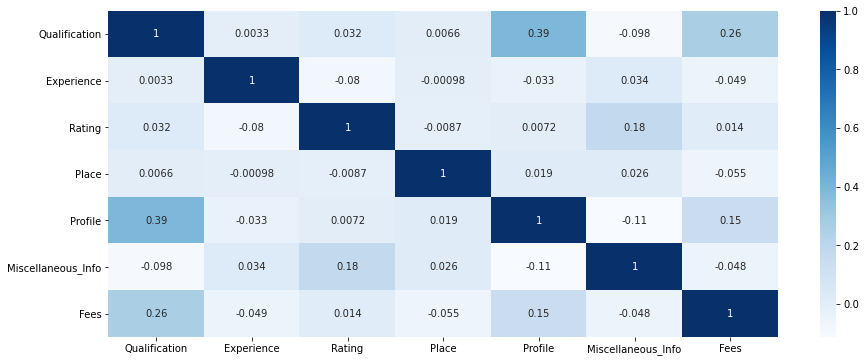

In [33]:
#plotting the heatmap for better underatanding of correlations
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

key observation:
    darker blue color is representing higher correaltions and lighter correlations is representing lower correlations
    fee has the highest correaltion with qualification 
    profile and experinence has good correaltions
    profile has postive correaltions with fees
    

In [34]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

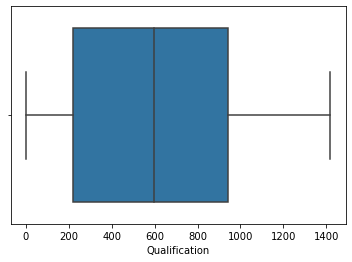

In [35]:
#checking for outliers using boxplot
sns.boxplot(df['Qualification'])

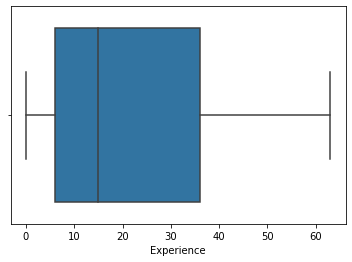

In [36]:
sns.boxplot(df['Experience'])

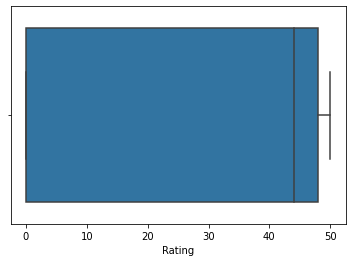

In [37]:
sns.boxplot(df['Rating'])

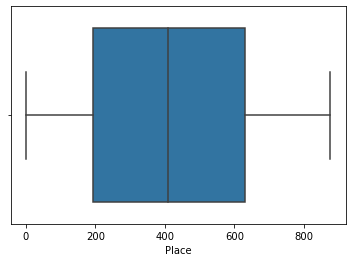

In [38]:
sns.boxplot(df['Place'])

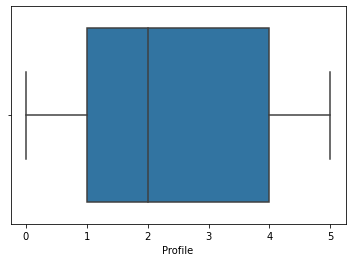

In [39]:
sns.boxplot(df['Profile'])

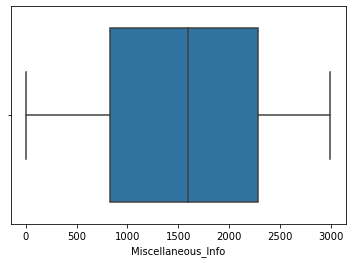

In [40]:
sns.boxplot(df['Miscellaneous_Info'])

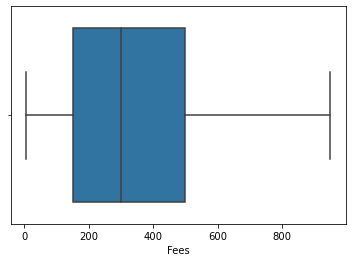

In [41]:
sns.boxplot(df['Fees'])

In [42]:
#checking for skewness
df.skew()

Qualification         0.239720
Experience            0.823531
Rating               -0.840796
Place                 0.118410
Profile               0.108803
Miscellaneous_Info   -0.101869
Fees                  0.751870
dtype: float64

Qualification
0.2396598428563482


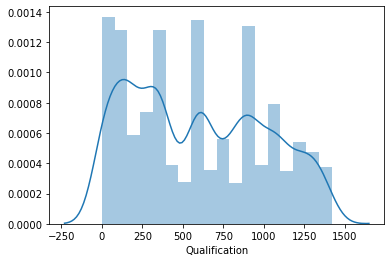

Experience
0.823324120721721


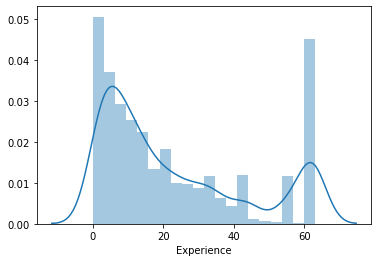

Rating
-0.8405846314840469


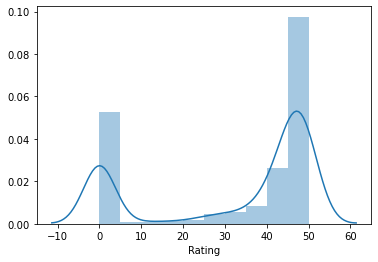

Place
0.11838003288165158


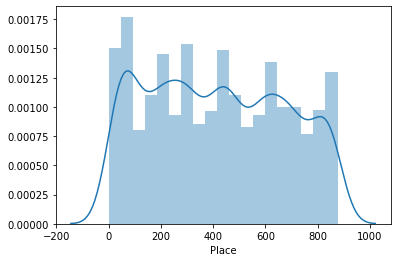

Profile
0.10877608187370336


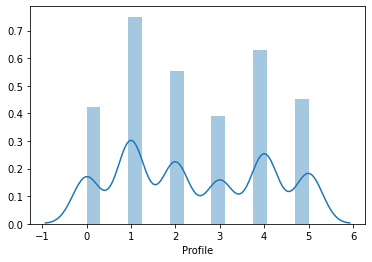

Miscellaneous_Info
-0.10184350565113451


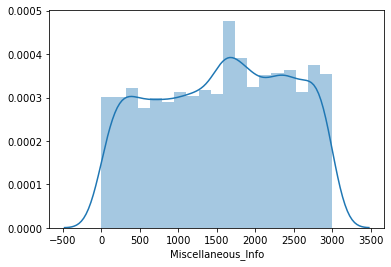

Fees
0.7516809577822484


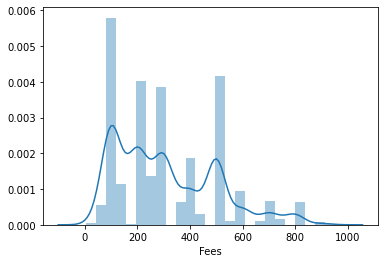

In [43]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# test data

In [44]:
#checking the types of data
dft.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [45]:
#cheking the columns about the data
dft.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [46]:
#checking the info about the data
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [47]:
#checking the info about the data
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


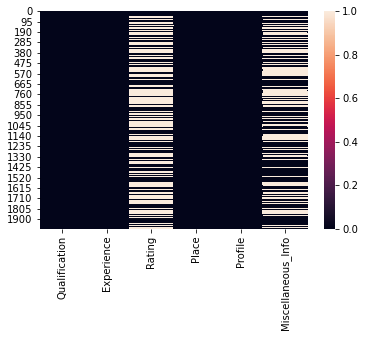

In [48]:
#using heatmap for better representation of the null values
sns.heatmap(dft.isnull())

In [49]:
#filling the null values 
dft.fillna(method='ffill', inplace=True)

In [50]:
#describing the dataset
dft.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,1985,1987,1987,1985
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,521,27,444,17


# Splitting the data

In [51]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100
1,73,3,49,866,0,1422,350
2,1135,63,49,457,3,1422,300
3,464,3,49,68,0,1695,250
4,10,12,0,337,0,253,250


In [52]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [53]:
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,16,0,299,5,130
1,73,3,49,866,0,1422
2,1135,63,49,457,3,1422
3,464,3,49,68,0,1695
4,10,12,0,337,0,253
...,...,...,...,...,...,...
5956,1075,10,49,70,3,1385
5957,596,26,49,541,4,1385
5958,596,35,48,216,4,1173
5959,943,6,41,850,4,2202


In [56]:
 y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [55]:
#checking the shaoe of x and y
print(x.shape, '\t\t', y.shape)

(5961, 6) 		 (5961,)


# model building

In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)

In [58]:
#importing the model library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error  etrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [60]:
#checking the train shape
x_train.shape

(4470, 6)

In [61]:
y_train.shape

(4470,)

In [62]:
#cheking the test shape
x_test.shape

(1491, 6)

In [63]:
y_test.shape

(1491,)

In [64]:
#all algorithms by using for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score;',r2_score(y_test,predm))
    print('***********************************************************')
    print('\n')

Score of LinearRegression() is: 0.07550857050996207
MAE: 146.3174220552223
MSE: 31774.530513482314
RMSE: 178.254117802317
R2_score; 0.08179875064471764
***********************************************************


Score of Lasso() is: 0.07549696778940596
MAE: 146.31805843087884
MSE: 31770.22209534033
RMSE: 178.24203234742453
R2_score; 0.08192325271781786
***********************************************************


Score of Ridge() is: 0.0755085704893953
MAE: 146.3174225416276
MSE: 31774.524743574526
RMSE: 178.2541016178156
R2_score; 0.08179891738003853
***********************************************************


Score of ElasticNet() is: 0.07541352651088351
MAE: 146.3205393020752
MSE: 31765.25438951274
RMSE: 178.22809652103885
R2_score; 0.08206680648945863
***********************************************************


Score of SVR() is: 0.015050034908350218
MAE: 145.1884058837374
MSE: 33960.57738185233
RMSE: 184.2839585581239
R2_score; 0.018627684597499194
****************************

In [65]:
#cross validate all algorithms by using for loop

from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of',m,'is:')
    print('score:',score)
    print('mean score:', score.mean())
    print('Standard deviation',score.std())
    print('********************************************')
    print('\n')

score of LinearRegression() is:
score: [0.06872793 0.0675701  0.07921016 0.07567598 0.07799728]
mean score: 0.07383629206858504
Standard deviation 0.004794523492927381
********************************************


score of Lasso() is:
score: [0.06913302 0.06727357 0.0788902  0.0760234  0.0779627 ]
mean score: 0.07385657921449924
Standard deviation 0.004744271988707421
********************************************


score of Ridge() is:
score: [0.0687285  0.06756982 0.07920988 0.07567648 0.07799725]
mean score: 0.07383638441911186
Standard deviation 0.004794445785781364
********************************************


score of ElasticNet() is:
score: [0.06986739 0.06685471 0.07848008 0.07668824 0.07783733]
mean score: 0.07394554982754972
Standard deviation 0.004693437906475855
********************************************


score of SVR() is:
score: [ 0.03486642 -0.00059862  0.02682766 -0.00825758  0.02550421]
mean score: 0.01566841912153416
Standard deviation 0.016893220820052474
********

random forest is giving the best reult and will use this model

In [66]:
#randomforest model is giving best results so finding the best parameters using Gridsearchcv
from sklearn.model_selection import GridSearchCV
RFC=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400],'max_depth':[4,5,6,7,8,9,10]}
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
clf.best_params_

{'max_depth': 9, 'n_estimators': 400}

In [68]:
#using random forest with best parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=9)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score;',r2_score(y_test,predm))
print('\n')

Score: 0.3710276450832616


MAE: 133.52049909364462
MSE: 28253.079965196786
RMSE: 168.0865252338711
R2_score; -0.03775399777227517




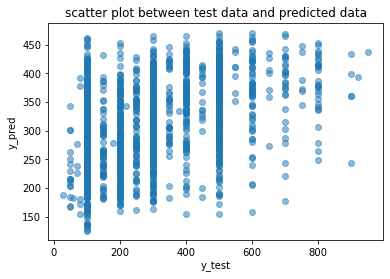

In [69]:
#plotting Scatterplot between test data and predicted data for random forest
plt.scatter(y_test,y_pred, alpha =0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('scatter plot between test data and predicted data')
plt.show()

In [71]:
#saving the Randomforest
import joblib
joblib.dump(rf,'doctorfee.pkl')

['doctorfee.pkl']